<a href="https://colab.research.google.com/github/jhay20ng/UpData/blob/main/(2)%EA%B2%B0%EC%B8%A1%EC%B9%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/student_data.csv")
df

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
0,GP,F,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6,5,6
1,GP,F,no,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5,5,5
2,GP,F,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8,7,8
3,GP,F,yes,yes,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15,15,14
4,GP,F,yes,no,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,yes,no,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9,9,9
391,MS,M,no,no,2.0,4.0,5.0,3.0,4.0,2.0,3.0,15,14,16
392,MS,M,no,no,5.0,5.0,3.0,3.0,3.0,3.0,3.0,8,10,8
393,MS,M,no,no,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11,11,12


<BarContainer object of 19 artists>

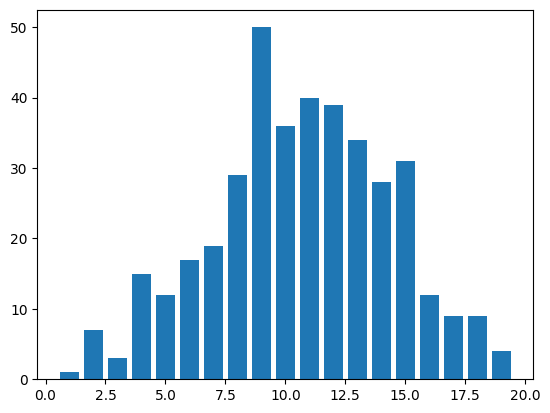

In [ ]:
import matplotlib.pyplot as plt
plt.bar(df['grade'].value_counts().index, df['grade'].value_counts().values)

<BarContainer object of 2 artists>

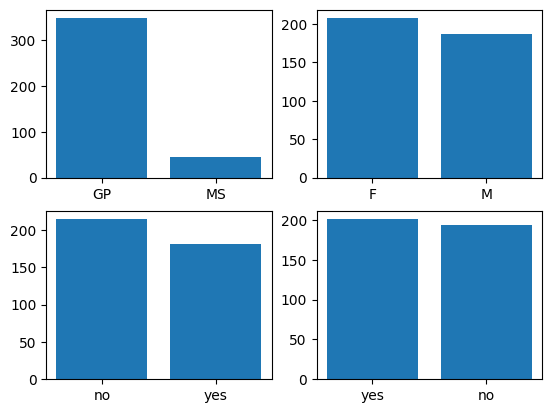

In [ ]:
fig, axs = plt.subplots(2,2)
axs[0][0].bar(df['school'].value_counts().index,
             df['school'].value_counts().values)
axs[0][1].bar(df['sex'].value_counts().index,
             df['sex'].value_counts().values)
axs[1][0].bar(df['paid'].value_counts().index,
             df['paid'].value_counts().values)
axs[1][1].bar(df['activities'].value_counts().index,
             df['activities'].value_counts().values)

In [ ]:
df[df.isna().any(axis=1)]

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
9,GP,M,yes,yes,5.0,5.0,NaN,1.0,1.0,5.0,0.0,15,14,15
14,GP,M,no,no,NaN,5.0,2.0,1.0,1.0,3.0,0.0,15,14,16
15,GP,F,no,no,4.0,4.0,4.0,1.0,2.0,2.0,NaN,14,14,14
25,GP,F,yes,no,1.0,2.0,2.0,1.0,NaN,5.0,14.0,8,6,9
39,GP,F,yes,yes,4.0,3.0,1.0,1.0,1.0,NaN,8.0,13,14,13
40,GP,F,no,yes,3.0,3.0,NaN,1.0,2.0,3.0,25.0,9,7,10
49,GP,F,no,yes,4.0,4.0,4.0,1.0,1.0,NaN,2.0,7,7,7
61,GP,F,no,yes,5.0,5.0,5.0,NaN,5.0,5.0,6.0,10,10,8
71,GP,M,no,no,3.0,3.0,3.0,NaN,1.0,3.0,0.0,10,10,10
82,GP,F,yes,no,4.0,4.0,4.0,1.0,1.0,5.0,NaN,6,7,6


In [ ]:
from sklearn.impute import KNNImputer

#결측치가 있는 수치형 데이터만을 추출
KNN_data = df.drop(columns=['school','sex','paid','activities'])

#모델링
imputer = KNNImputer()
df_filled = imputer.fit_transform(KNN_data)
df_filled = pd.DataFrame(df_filled, columns = KNN_data.columns)
df[KNN_data.columns] = df_filled

#결측치 확인
df.isna().sum()

school        0
sex           0
paid          0
activities    0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
grade         0
G1            0
G2            0
dtype: int64